In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.Age.fillna(df.Age.mean, inplace= True)

In [7]:
df.drop(columns= ['Cabin', 'PassengerId', 'Ticket'], inplace= True)

In [8]:
df.duplicated().sum()

0

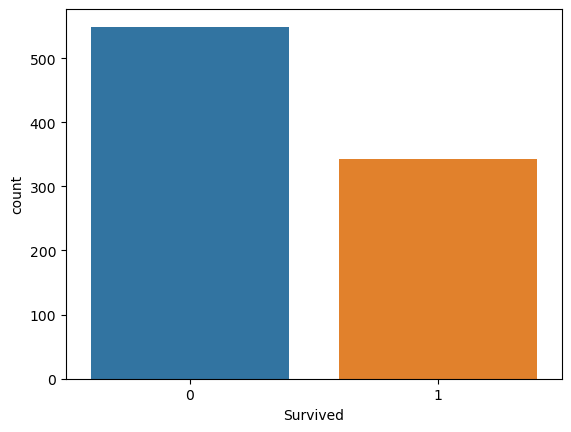

In [9]:
sns.countplot(data = df, x = 'Survived')
plt.show()

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
le = LabelEncoder()

In [12]:
for i in ['Name', 'Sex', 'Embarked']:
        df[i] = le.fit_transform(df[i])

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,108,1,22.0,1,0,7.2500,2
1,1,1,190,0,38.0,1,0,71.2833,0
2,1,3,353,0,26.0,0,0,7.9250,2
3,1,1,272,0,35.0,1,0,53.1000,2
4,0,3,15,1,35.0,0,0,8.0500,2


In [14]:
# Replace non-numeric values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with NaN in 'Age' column
df.dropna(subset=['Age'], inplace=True)

# Convert 'Age' column to integer
df['Age'] = df['Age'].astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    int32  
 3   Sex       714 non-null    int32  
 4   Age       714 non-null    int32  
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Fare      714 non-null    float64
 8   Embarked  714 non-null    int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 44.6 KB


In [16]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [17]:
sc = StandardScaler()

In [18]:
x = sc.fit_transform(x)

### Over Sampling

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
oversampler = RandomOverSampler()

In [21]:
x_over , y_over = oversampler.fit_resample(x, y)

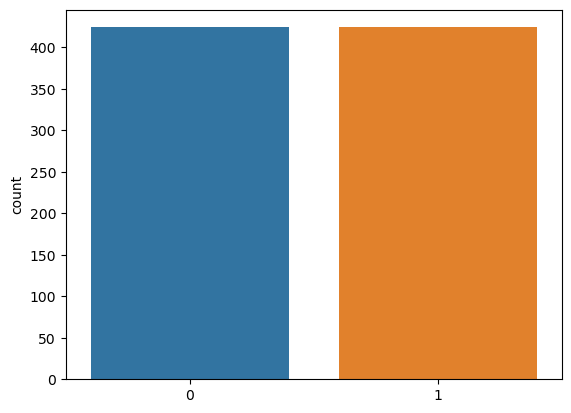

In [22]:
sns.countplot(x = y_over)
plt.show()

### Under Sampling

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
undersample = RandomUnderSampler()

In [25]:
x_under, y_under = undersample.fit_resample(x,y)

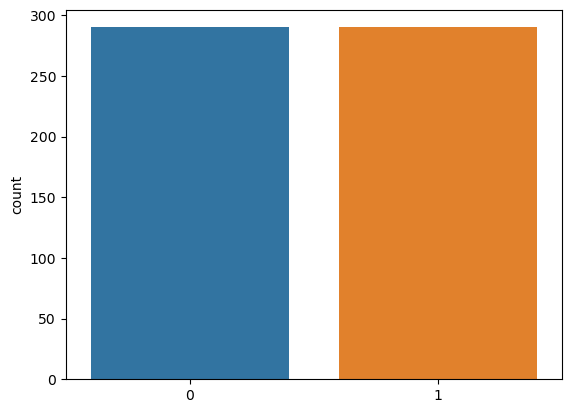

In [26]:
sns.countplot(x = y_under)
plt.show()

### SMOTE , ADASYN : Symthetic Minority Oversampling Technique (SMOTE) and the Adaptive Synthetic (ADASYN) are two methods used in oversampling,. These also generate low examples but ADASYN takes into account the density of distribution to distribute the data points evenly.

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE()

In [29]:
x_smote, y_smote = smote.fit_resample(x, y)

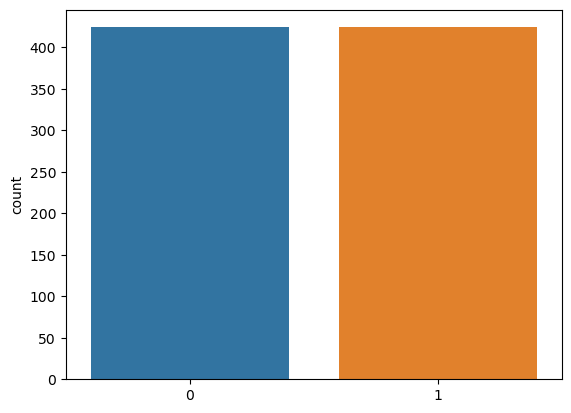

In [30]:
sns.countplot(x = y_smote)
plt.show()

### ADASYN

In [31]:
from imblearn.over_sampling import ADASYN

In [32]:
adasyn = ADASYN()

In [33]:
x_adasyn, y_adasyn = adasyn.fit_resample(x, y)

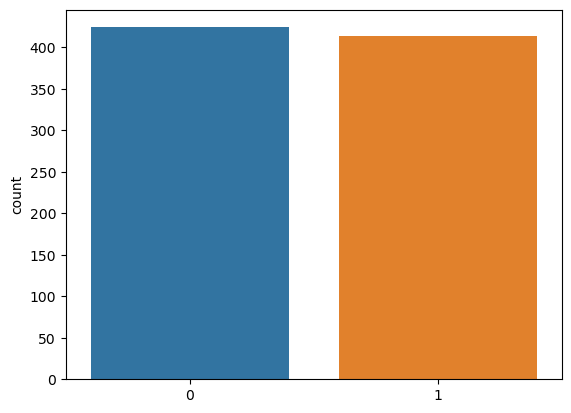

In [34]:
sns.countplot(x = y_adasyn)
plt.show()